### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import time

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/athens_listings.csv')
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
df.head()

Dataset shape: (14987, 79)

Column names:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'avail

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27262,https://www.airbnb.com/rooms/27262,20250318145108,2025-03-20,previous scrape,"AQA-No7, Great mattress, high speed internet",THE MATTRESS - KING KOIL - Camden Luxury 160x2...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,NaN,4,12,"['email', 'phone']",t,t,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98924,23.76500,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Hot water"", ""Hangers"", ""Refrigerator"", ""Cent...",NaN,1,1125,1.0,3.0,1125.0,1125.0,2.2,1125.0,NaN,t,0,0,0,0,2025-03-20,29,4,0,0,5,24,NaN,2012-09-21,2024-11-18,4.86,4.89,4.90,4.86,4.97,4.75,4.71,00002433111,t,1,1,0,0,0.19
1,33945,https://www.airbnb.com/rooms/33945,20250318145108,2025-03-19,city scrape,Spacious Cosy aprtm very close to Metro!,Apartment located near metro station. Safe nei...,Neighbourhood is alive all day and safe all da...,https://a0.muscache.com/pictures/1a7a1026-f5f1...,146553,https://www.airbnb.com/users/show/146553,Katerina,2010-06-17,Greece,"Kind, respectful, generous and giving\r\n",within a few hours,100%,71%,f,https://a0.muscache.com/im/pictures/user/4cfe0...,https://a0.muscache.com/im/pictures/user/4cfe0...,Agios Nikolaos,2,2,"['email', 'phone']",t,t,"Athens, Αττική, Greece",ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,NaN,38.00673,23.72775,Entire condo,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Long term stays allowed"", ""Hot water"", ""Elev...",$30.00,4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,16,20,21,274,2025-03-19,79,10,1,197,8,80,2400.0,2010-11-02,2025-03-10,4.73,4.74,4.69,4.88,4.89,4.62,4.80,00000874421,f,2,2,0,0,0.45
2,49489,https://www.airbnb.com/rooms/49489,20250318145108,2025-03-19,city scrape,Ermou 44 - 3bdr apt in the heart of Athens,"Fully furnished, 98 sq.mt., apartment on 44 Er...",The apartment is located at the commercial cen...,https://a0.muscache.com/pictures/9640239/4bfd2...,225612,https://www.airbnb.com/users/show/225612,Stathis,2010-09-06,"Athens, Greece",Hi everyone! My name is Stathis and I own Athe...,within an hour,100%,75%,f,https://a0.muscache.com/im/users/225612/profil...,https://a0.muscache.com/im/users/225612/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Athens, Αττική, Greece",ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,NaN,37.97670,23.73064,Entire rental unit,Entire home/apt,7,1.5,1.5 baths,3.0,4.0,"[""Hot water"", ""Elevator"", ""Hangers"", ""Heating""...",$160.00,2,365,2.0,2.0,1125.0,1125.0,2.0,1

### Missing Values

In [3]:
print(f"Shape: {df.shape}")

print(df.dtypes.value_counts())

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0].head(20))

Shape: (14987, 79)
object     35
int64      22
float64    22
Name: count, dtype: int64
                          Column  Missing_Count  Missing_Percentage
29  neighbourhood_group_cleansed          14987          100.000000
49              calendar_updated          14987          100.000000
21            host_neighbourhood           9296           62.027090
14                    host_about           7546           50.350304
27                 neighbourhood           7447           49.689731
7          neighborhood_overview           7447           49.689731
13                 host_location           4792           31.974378
66        review_scores_accuracy           2572           17.161540
63                  first_review           2572           17.161540
64                   last_review           2572           17.161540
67     review_scores_cleanliness           2572           17.161540
70        review_scores_location           2572           17.161540
65          review_scores_rat

### Clean Price Column

In [4]:
print(df['price'].head(10))

0        NaN
1     $30.00
2    $160.00
3     $50.00
4     $37.00
5     $70.00
6     $56.00
7     $50.00
8        NaN
9     $50.00
Name: price, dtype: object


In [5]:
# Remove currency symbols and convert to float
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)

# Remove outliers
q01, q99 = df['price'].quantile([0.005, 0.995])

original_count = len(df)
df = df[(df['price'] >= q01) & (df['price'] <= q99) & (df['price'] > 0)]
removed_count = original_count - len(df)

print(df['price'].describe())
print(f"Removed {removed_count} outliers ({removed_count/original_count*100:.2f}%)")
print(f"Final dataset shape: {df.shape}")


count    13720.000000
mean        87.254082
std         87.389216
min         18.000000
25%         44.000000
50%         61.000000
75%         92.000000
max        655.000000
Name: price, dtype: float64
Removed 1267 outliers (8.45%)
Final dataset shape: (13720, 79)


### Clean Propery Type column

In [6]:
# Clean property_type column 
print("Original property_type distribution:")
print(df['property_type'].value_counts())

# Fix propery types
df['property_type'] = df['property_type'].replace({
    'Entire home/apt': 'Entire rental unit',
    'Entire serviced apartment': 'Entire rental unit',
    'Room in aparthotel': 'Room in hotel',
    'Room in boutique hotel': 'Room in hotel',
    'Private room in condo': 'Private room in rental unit',
    'Private room in home': 'Private room in rental unit',
    'Private room in serviced apartment': 'Private room in rental unit'
})

# Replace categories with less than 30 listings
small_categories = df['property_type'].value_counts()[df['property_type'].value_counts() < 30].index
df.loc[df['property_type'].isin(small_categories), 'property_type'] = 'Entire rental unit'

# Final proprty type
print("\nFinal property_type distribution:")
print(df['property_type'].value_counts())



Original property_type distribution:
property_type
Entire rental unit                    9082
Entire condo                          2779
Private room in rental unit            371
Entire home                            352
Entire serviced apartment              252
Room in hotel                          172
Entire loft                            120
Room in aparthotel                     120
Private room in condo                  112
Room in boutique hotel                  70
Private room in home                    36
Private room in serviced apartment      34
Entire townhouse                        26
Room in serviced apartment              24
Private room in guest suite             18
Private room in bed and breakfast       18
Entire villa                            16
Private room in hostel                  16
Tiny home                               14
Shared room in hostel                   13
Entire vacation home                    12
Entire guesthouse                       10
Ent

### Feature Engineering

In [7]:
# Calculate distance to Acropolis using Manhattan distance formula

df['distance_acropolis'] = (np.abs(df['latitude'] - 37.9715) + 
                           np.abs(df['longitude'] - 23.7267) * np.cos(np.radians(37.9715))) * 111.32

# Bathrooms
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)
df['bathrooms'] = df['bathrooms'].fillna(1).apply(lambda x: max(1, round(float(x))))

# Convert host_since to datetime and calculate experience
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

df['host_experience_years'] = (pd.Timestamp.now() - df['host_since']).dt.days / 365.25
df['host_experience_years'] = df['host_experience_years'].fillna(0)

# New host indicator (less than 1 year)
df['is_new_host'] = (df['host_experience_years'] < 1).astype(int)

# Host quality 
df['is_superhost'] = (df['host_is_superhost'] == 't').astype(int)

df['is_instant_bookable'] = (df['instant_bookable'] == 't').astype(int)

df['host_verified'] = (df['host_identity_verified'] == 't').astype(int)

# Log transform of review count 
df['review_count_log'] = np.log1p(df['number_of_reviews'].fillna(0))

df['has_reviews'] = (df['number_of_reviews'] > 0).astype(int)

# Review scores rating
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

# Availability ratio and low availability indicator
df['availability_ratio'] = df['availability_365'] / 365
df['low_availability'] = (df['availability_365'] < 90).astype(int)

# Minimum nights categories 
df['min_nights_category'] = pd.cut(df['minimum_nights'], 
                                  bins=[0, 1, 3, 7, 30, float('inf')], 
                                  labels=[0, 1, 2, 3, 4]).astype(int)

In [8]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    12757
Private room         887
Hotel room            57
Shared room           19
Name: count, dtype: int64


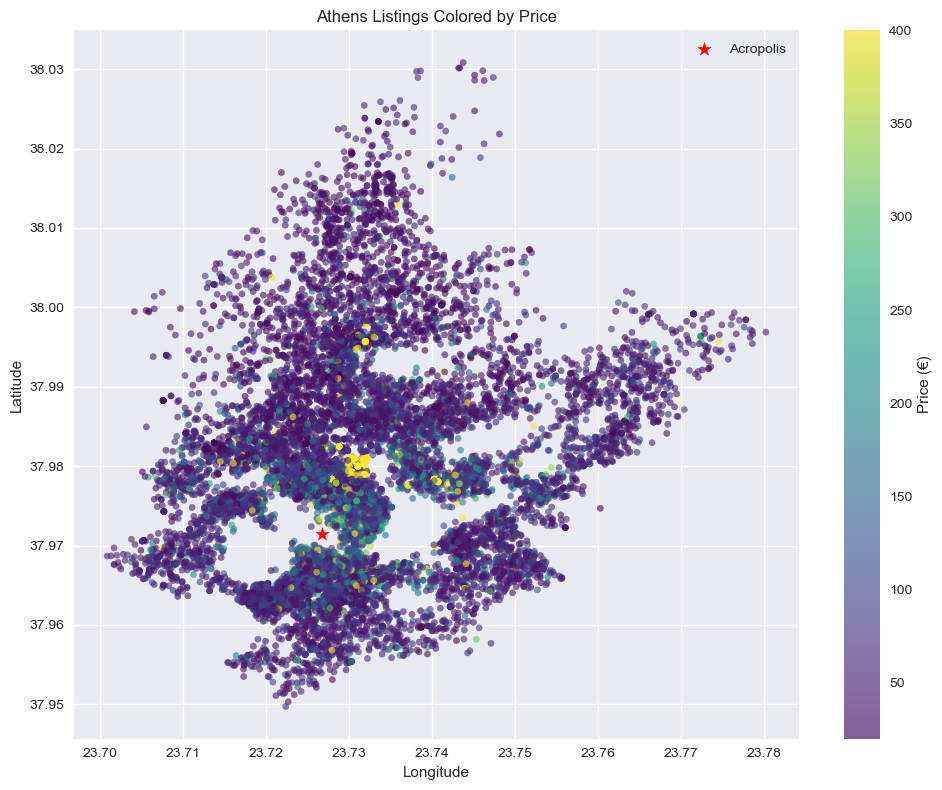

In [9]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8))


scatter = ax.scatter(df['longitude'], df['latitude'], c=df['price'], 
                    cmap='viridis', alpha=0.6, s=20,
                    vmin=20, vmax=400)  
ax.set_title('Athens Listings Colored by Price')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add Acropolis location
ax.scatter(23.7267, 37.9715, c='red', s=100, marker='*', label='Acropolis')
ax.legend()

# Add colorbar
plt.colorbar(scatter, ax=ax, label='Price (€)')

plt.tight_layout()
plt.show()

### Data pre-processing

In [10]:
# Create a copy for model training
model_df = df.copy()

# Define feature sets 
numeric_features = [
    'accommodates', 'bedrooms', 'beds', 'bathrooms', 
    'minimum_nights', 'maximum_nights', 'calculated_host_listings_count',
    'distance_acropolis', 'host_experience_years',
    'availability_ratio', 'is_superhost', 'is_instant_bookable',
    'review_count_log', 'has_reviews', 'review_scores_rating',
    'is_new_host', 'low_availability', 'host_verified', 'min_nights_category'
]

categorical_features = ['property_type', 'room_type', 'neighbourhood_cleansed']

# Filter available features
numeric_features = [f for f in numeric_features if f in model_df.columns]
categorical_features = [f for f in categorical_features if f in model_df.columns]

# Create model dataset
model_df = model_df[numeric_features + categorical_features + ['price']].copy()

# Smart missing value handling 
for col in numeric_features:
    if col in ['accommodates', 'bedrooms', 'beds']:
        model_df[col] = model_df[col].fillna(1)
    elif col in ['bathrooms']:
        model_df[col] = model_df[col].fillna(1.0)
    elif col in ['minimum_nights']:
        model_df[col] = model_df[col].fillna(1)
    elif col in ['maximum_nights']:
        model_df[col] = model_df[col].fillna(365)
    elif col in ['calculated_host_listings_count']:
        model_df[col] = model_df[col].fillna(1)
    elif col in ['review_scores_rating']:
        model_df[col] = model_df[col].fillna(model_df[col].median())
    else:
        model_df[col] = model_df[col].fillna(model_df[col].median() if model_df[col].notna().any() else 0)

# Categorical encoding 
encoders = {}

for col in categorical_features:
    model_df[col] = model_df[col].fillna('Unknown')
    top_cats = model_df[col].value_counts().head(20).index
    model_df[col] = model_df[col].apply(lambda x: x if x in top_cats else 'Other')
    
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    encoders[col] = le

# Remove rows with missing price
model_df = model_df.dropna(subset=['price'])
all_features = numeric_features + categorical_features

print(f"Final model dataset shape: {model_df.shape}")
print(f"Features: {len(all_features)}")

# Prepare X and y
X = model_df[all_features]
y = model_df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Final model dataset shape: (13720, 23)
Features: 22
Training set: (10976, 22)
Test set: (2744, 22)


### Correlation Matrix

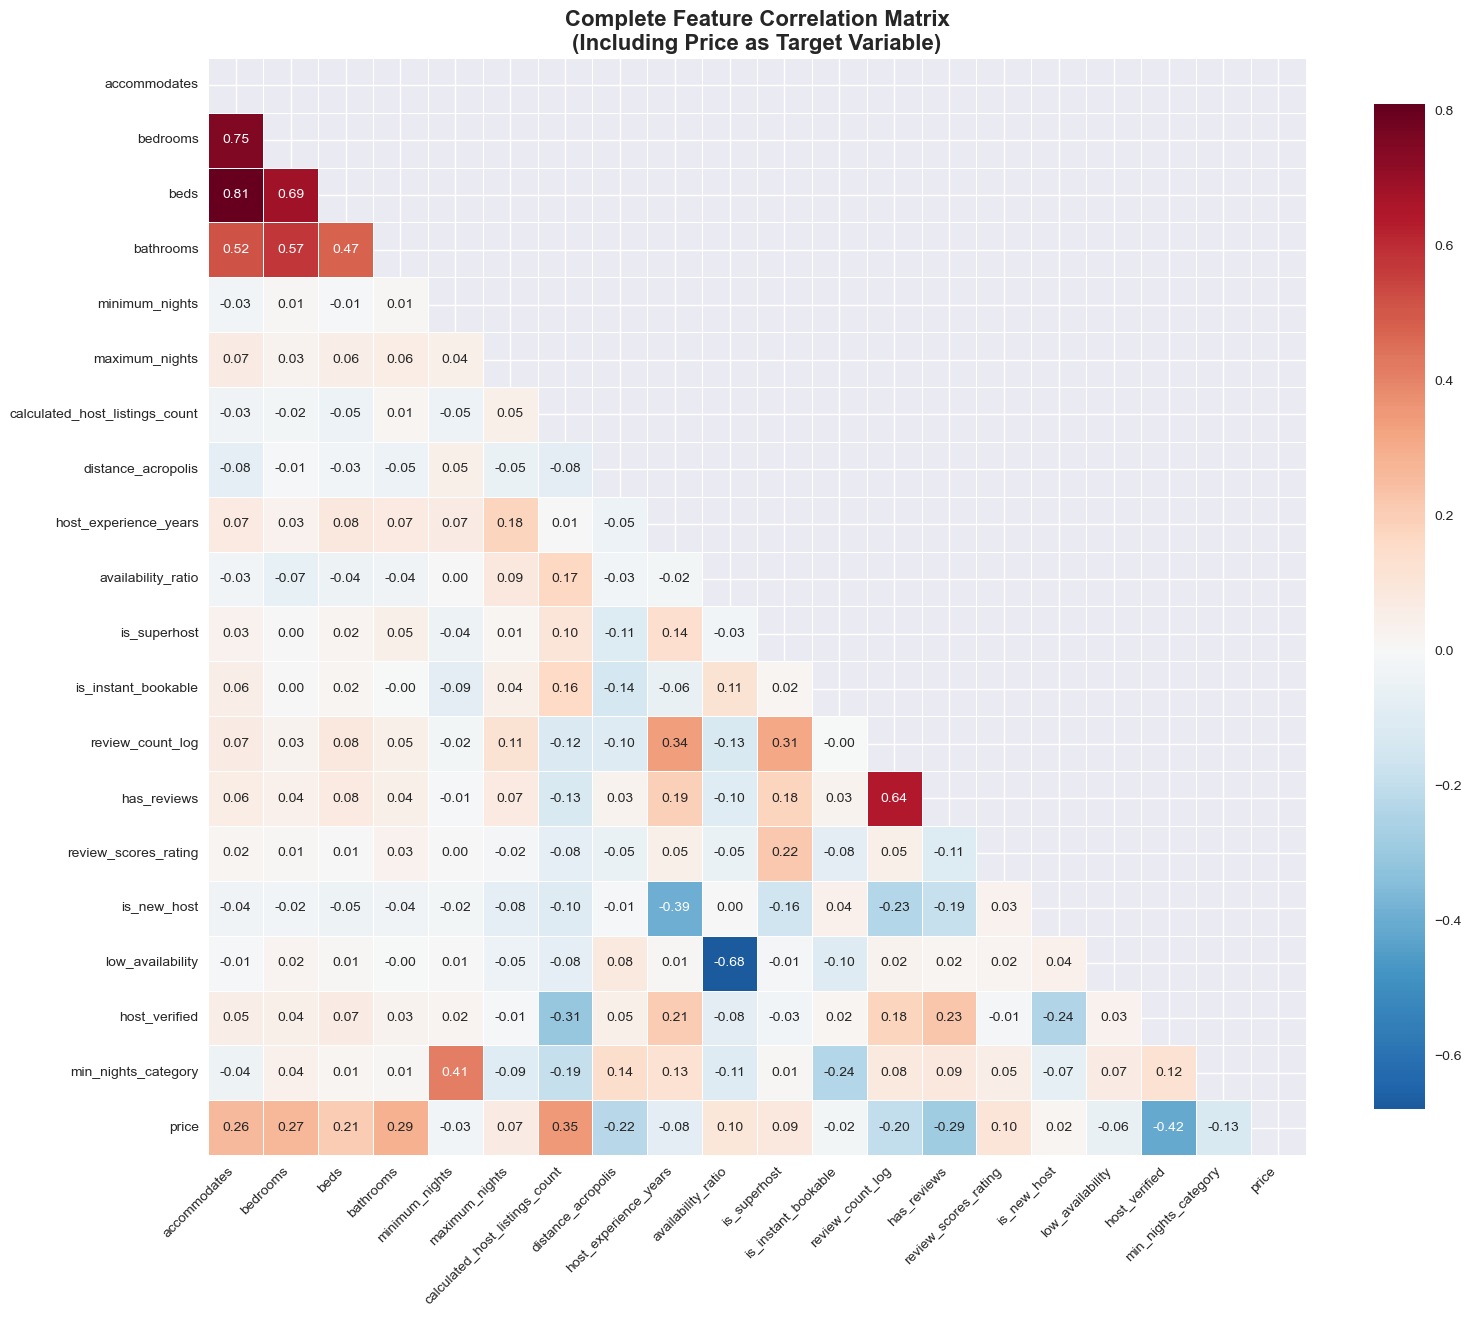

In [11]:
corr_features = numeric_features + ['price']
correlation_data = df[corr_features].select_dtypes(include=[np.number])
correlation_matrix = correlation_data.corr()

# Correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.2f', 
            cbar_kws={'shrink': 0.8}, 
            linewidths=0.5)
plt.title('Complete Feature Correlation Matrix\n(Including Price as Target Variable)', 
          fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
model_df

,accommodates,bedrooms,beds,bathrooms,minimum_nights,maximum_nights,calculated_host_listings_count,distance_acropolis,host_experience_years,availability_ratio,is_superhost,is_instant_bookable,review_count_log,has_reviews,review_scores_rating,is_new_host,low_availability,host_verified,min_nights_category,property_type,room_type,neighbourhood_cleansed,price
1,4,2.0,3.0,1,4,1125,2,4.013947,15.036277,0.750685,0,0,4.382027,1,4.73,0,0,1,2,0,0,0,30.0
2,7,3.0,4.0,2,2,365,1,0.924620,14.814511,0.471233,0,1,4.948760,1,4.68,0,0,1,1,3,0,5,160.0
3,2,1.0,3.0,1,6,210,1,1.659133,14.614648,0.235616,1,0,3.583519,1,4.97,0,1,1,2,0,0,20,50.0
4,2,1.0,1.0,1,3,90,1,2.845954,14.075291,0.789041,0,0,4.043051,1,4.65,0,0,1,1,0,0,16,37.0
5,4,1.0,2.0,1,2,366,1,2.158240,14.015058,0.832877,0,0,5.375278,1,4.72,0,0,1,1,3,0,14,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14982,2,1.0,1.0,1,2,90,8,0.895201,0.525667,1.000000,0,1,0.000000,0,4.87,1,0,1,1,3,0,7,75.0
14983,2,1.0,1.0,1,2,90,8,0.854709,0.525667,1.000000,0,1,0.000000,0,4.87,1,0,1,1,3,0,5,60.0
14984,9,3.0,3.0,1,1,365,7,1.109974,6.970568,0.986301,0,1,0.000000,0,4.87,0,0,1,0,3,0,15,180.0
14985,2,1.0,1.0,1,1,365,34,1.852627,3.375770,0.939726,0,1,0.693147,1,5.00,0,0,1,0,3,0,10,39.0


### Linear Regression

Linear Regression Results:
R² Score: 0.450
MAE: €41.74
RMSE: €66.02
Training Time: 0.02 seconds

Top 5 Most Important Features:
  host_verified: 0.163
  calculated_host_listings_count: 0.110
  distance_acropolis: 0.097
  bathrooms: 0.089
  has_reviews: 0.087


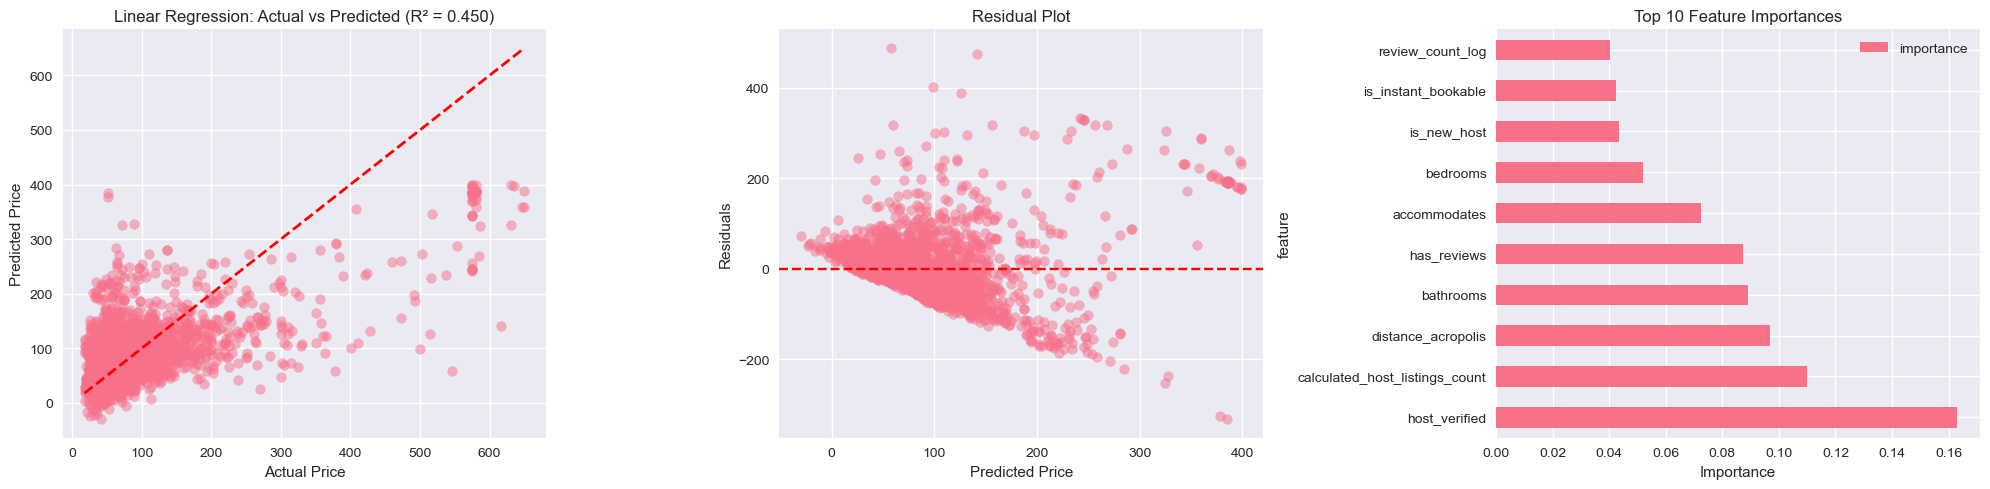

In [13]:
# Scale features for Linear Regression
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled = scaler_lr.transform(X_test)

# Train Linear Regression
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
end_time = time.time()
lr_time = end_time - start_time

print("Linear Regression Results:")
print(f"R² Score: {lr_r2:.3f}")
print(f"MAE: €{lr_mae:.2f}")
print(f"RMSE: €{lr_rmse:.2f}")
print(f"Training Time: {lr_time:.2f} seconds")

# Feature importance 
lr_feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': np.abs(lr_model.coef_)
}).sort_values('importance', ascending=False)
lr_feature_importance['importance'] = lr_feature_importance['importance'] / lr_feature_importance['importance'].sum()

print("\nTop 5 Most Important Features:")
for _, row in lr_feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Actual vs Predicted
axes[0].scatter(y_test, lr_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Linear Regression: Actual vs Predicted (R² = {lr_r2:.3f})')

# Residuals
residuals = y_test - lr_pred
axes[1].scatter(lr_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Feature importance
lr_feature_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=axes[2])
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

### Random Forest

Random Forest Results:
R² Score: 0.724
MAE: €26.23
RMSE: €46.80
Training Time: 1.03 seconds

Top 5 Most Important Features:
  calculated_host_listings_count: 0.427
  distance_acropolis: 0.101
  bedrooms: 0.079
  bathrooms: 0.059
  host_experience_years: 0.040


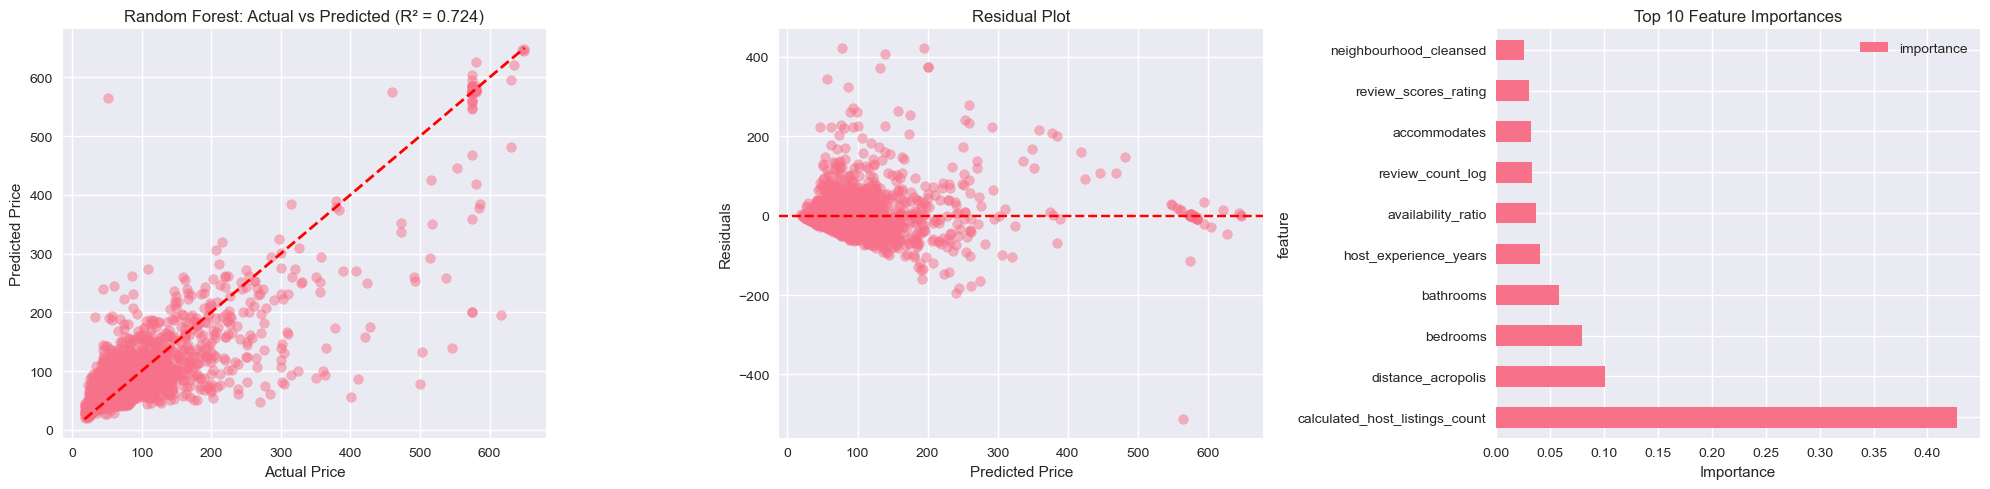

In [14]:
# Train Random Forest
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate metrics
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
end_time = time.time()
rf_time = end_time - start_time

print("Random Forest Results:")
print(f"R² Score: {rf_r2:.3f}")
print(f"MAE: €{rf_mae:.2f}")
print(f"RMSE: €{rf_rmse:.2f}")
print(f"Training Time: {rf_time:.2f} seconds")

# Feature importance
rf_feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
for _, row in rf_feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Actual vs Predicted
axes[0].scatter(y_test, rf_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Random Forest: Actual vs Predicted (R² = {rf_r2:.3f})')

# Residuals
residuals = y_test - rf_pred
axes[1].scatter(rf_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Feature importance
rf_feature_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=axes[2])
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

### Gradient Boosting

Gradient Boosting Results:
R² Score: 0.754
MAE: €25.04
RMSE: €44.17
Training Time: 6.10 seconds

Top 5 Most Important Features:
  calculated_host_listings_count: 0.394
  distance_acropolis: 0.108
  bedrooms: 0.062
  bathrooms: 0.061
  host_experience_years: 0.055


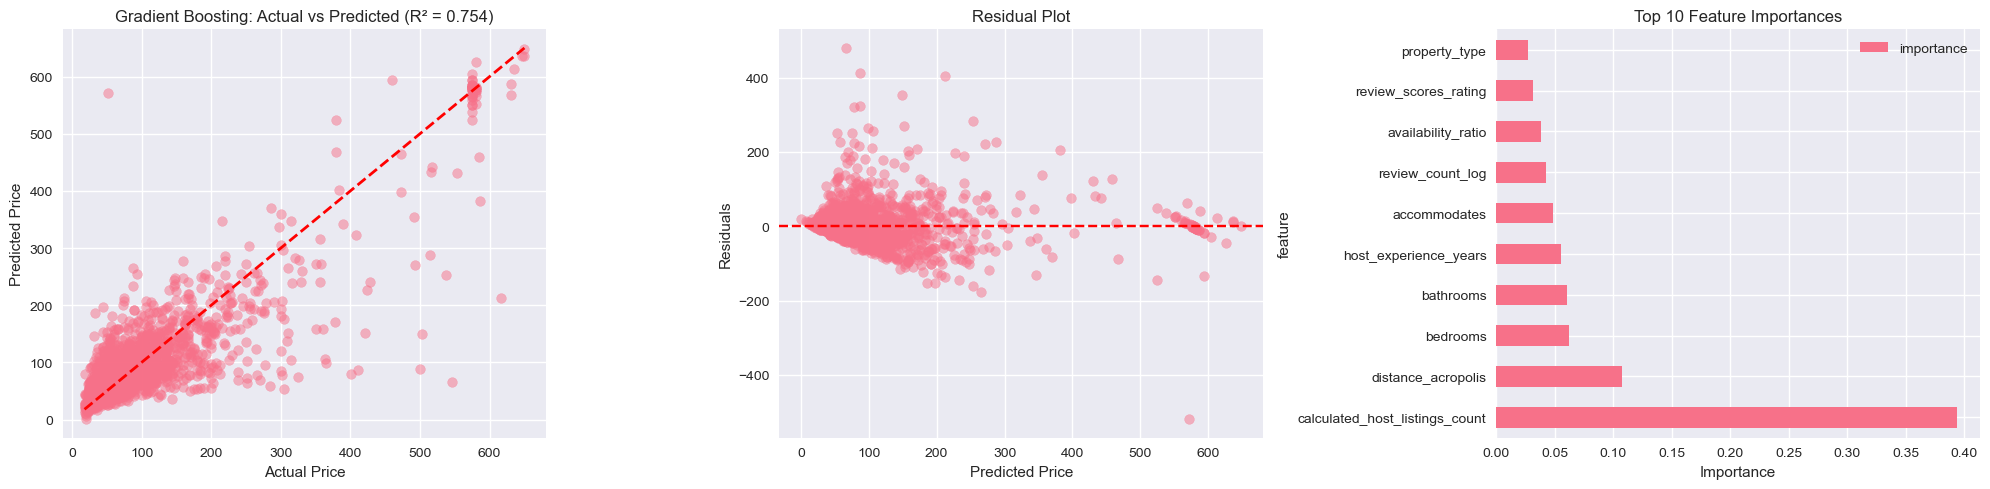

In [15]:
# Train Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)

# Calculate metrics
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
end_time = time.time()
gb_time = end_time - start_time

print("Gradient Boosting Results:")
print(f"R² Score: {gb_r2:.3f}")
print(f"MAE: €{gb_mae:.2f}")
print(f"RMSE: €{gb_rmse:.2f}")
print(f"Training Time: {gb_time:.2f} seconds")

# Feature importance
gb_feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
for _, row in gb_feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Actual vs Predicted
axes[0].scatter(y_test, gb_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Gradient Boosting: Actual vs Predicted (R² = {gb_r2:.3f})')

# Residuals
residuals = y_test - gb_pred
axes[1].scatter(gb_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Feature importance
gb_feature_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=axes[2])
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

### XGBoost (Extreme Gradient Boosting)

XGBoost Results:
R² Score: 0.761
MAE: €24.45
RMSE: €43.54
Training Time: 0.86 seconds

Top 5 Most Important Features:
  host_verified: 0.206
  calculated_host_listings_count: 0.145
  is_new_host: 0.123
  has_reviews: 0.094
  bedrooms: 0.073


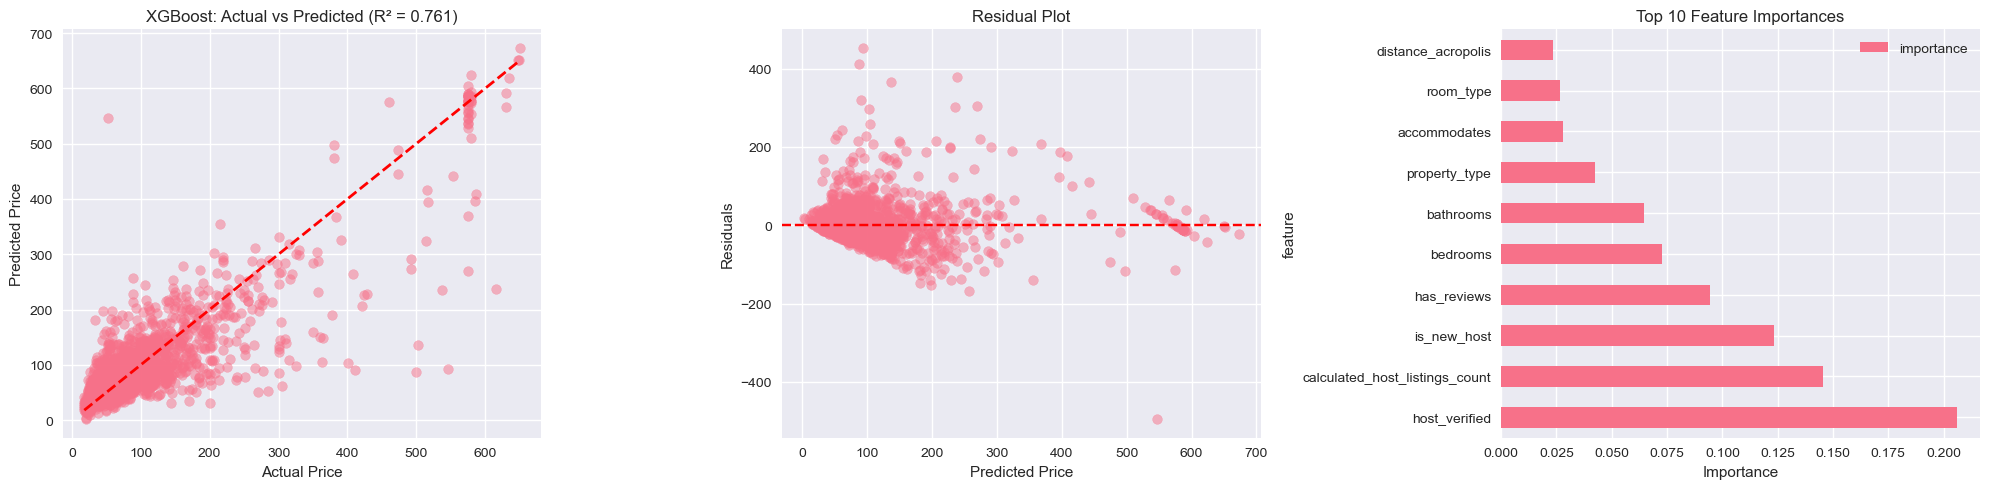

In [16]:
# Scale features 
scaler_xgb = StandardScaler()
numeric_indices = [i for i, col in enumerate(all_features) if col in numeric_features]
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

if numeric_indices:
    X_train_xgb.iloc[:, numeric_indices] = scaler_xgb.fit_transform(X_train.iloc[:, numeric_indices])
    X_test_xgb.iloc[:, numeric_indices] = scaler_xgb.transform(X_test.iloc[:, numeric_indices])

# Train XGBoost 
start_time = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.08,
    max_depth=7,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.1,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_xgb, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_xgb)

# Calculate metrics
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
end_time = time.time()
xgb_time = end_time - start_time

print("XGBoost Results:")
print(f"R² Score: {xgb_r2:.3f}")
print(f"MAE: €{xgb_mae:.2f}")
print(f"RMSE: €{xgb_rmse:.2f}")
print(f"Training Time: {xgb_time:.2f} seconds")

# Feature importance
xgb_feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
for _, row in xgb_feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Actual vs Predicted
axes[0].scatter(y_test, xgb_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'XGBoost: Actual vs Predicted (R² = {xgb_r2:.3f})')

# Residuals
residuals = y_test - xgb_pred
axes[1].scatter(xgb_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Feature importance
xgb_feature_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=axes[2])
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

### LightGBM


LightGBM Results:
R² Score: 0.752
MAE: €25.30
RMSE: €44.38
Training Time: 2.81 seconds

Top 5 Most Important Features:
  distance_acropolis: 0.158
  availability_ratio: 0.144
  host_experience_years: 0.140
  review_count_log: 0.102
  calculated_host_listings_count: 0.082


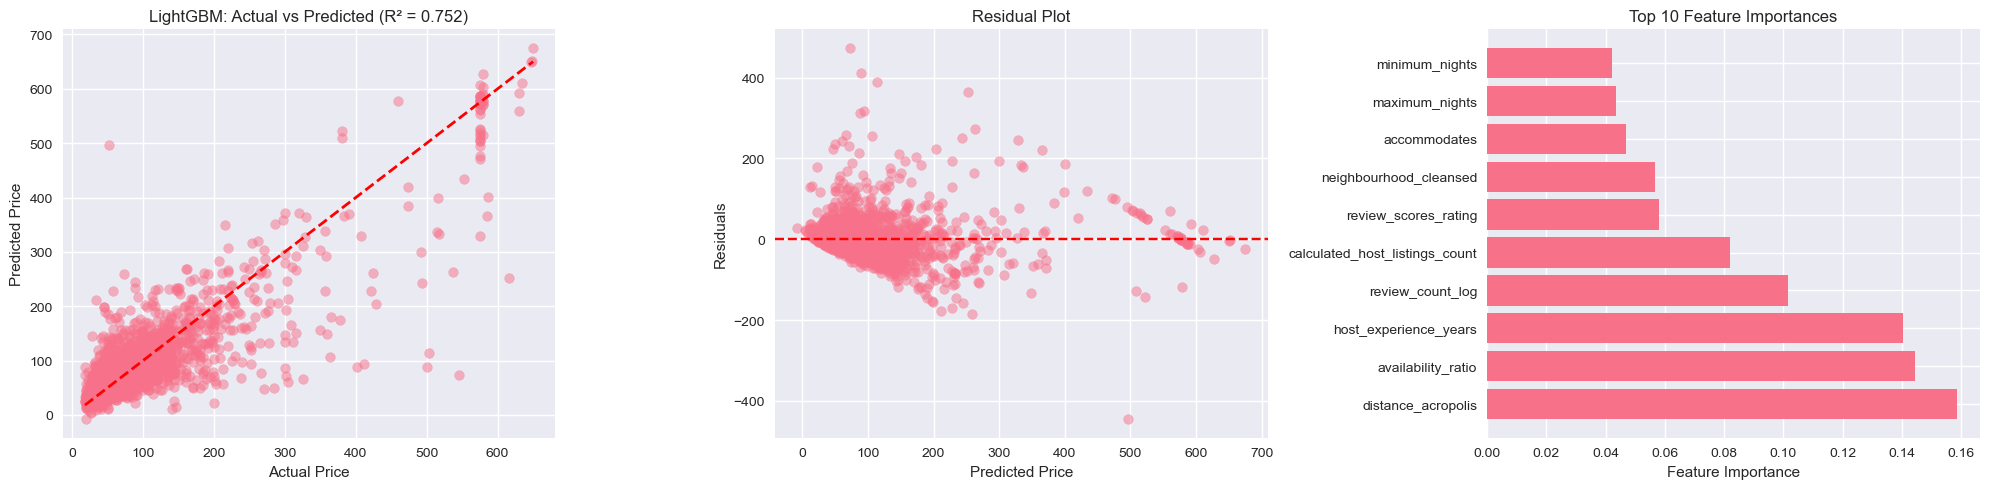

In [17]:

# Train LightGBM 
start_time = time.time()
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    verbose=-1
)
lgb_model.fit(X_train, y_train)
lgb_train_time = time.time() - start_time

# Make predictions
lgb_pred = lgb_model.predict(X_test)

# Calculate metrics
lgb_r2 = r2_score(y_test, lgb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
end_time = time.time()
lgb_time = end_time - start_time

print("LightGBM Results:")
print(f"R² Score: {lgb_r2:.3f}")
print(f"MAE: €{lgb_mae:.2f}")
print(f"RMSE: €{lgb_rmse:.2f}")
print(f"Training Time: {lgb_time:.2f} seconds")

# Feature importance 
lgb_feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

lgb_feature_importance['importance'] = lgb_feature_importance['importance'] / lgb_feature_importance['importance'].sum()

print("\nTop 5 Most Important Features:")
for _, row in lgb_feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Actual vs Predicted
axes[0].scatter(y_test, lgb_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'LightGBM: Actual vs Predicted (R² = {lgb_r2:.3f})')

# Residuals
residuals = y_test - lgb_pred
axes[1].scatter(lgb_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Feature Importance
top_features = lgb_feature_importance.head(10)
axes[2].barh(range(len(top_features)), top_features['importance'])
axes[2].set_yticks(range(len(top_features)))
axes[2].set_yticklabels(top_features['feature'])
axes[2].set_xlabel('Feature Importance')
axes[2].set_title('Top 10 Feature Importances')

plt.tight_layout()
plt.show()

### Model Comparison

MODEL PERFORMANCE COMPARISON:
                   R² Score    MAE (€)   RMSE (€) Training Time (s)
Linear Regression  0.450291  41.736606   66.02403          0.017084
Random Forest      0.723855  26.227703  46.795544          1.026093
Gradient Boosting  0.754001  25.035204  44.167441          6.096974
XGBoost            0.760899  24.448321   43.54385          0.862055
LightGBM           0.751595  25.299773   44.38289          2.812315

Best Models: R²=XGBoost, MAE=XGBoost, RMSE=XGBoost, Training Time=Linear Regression


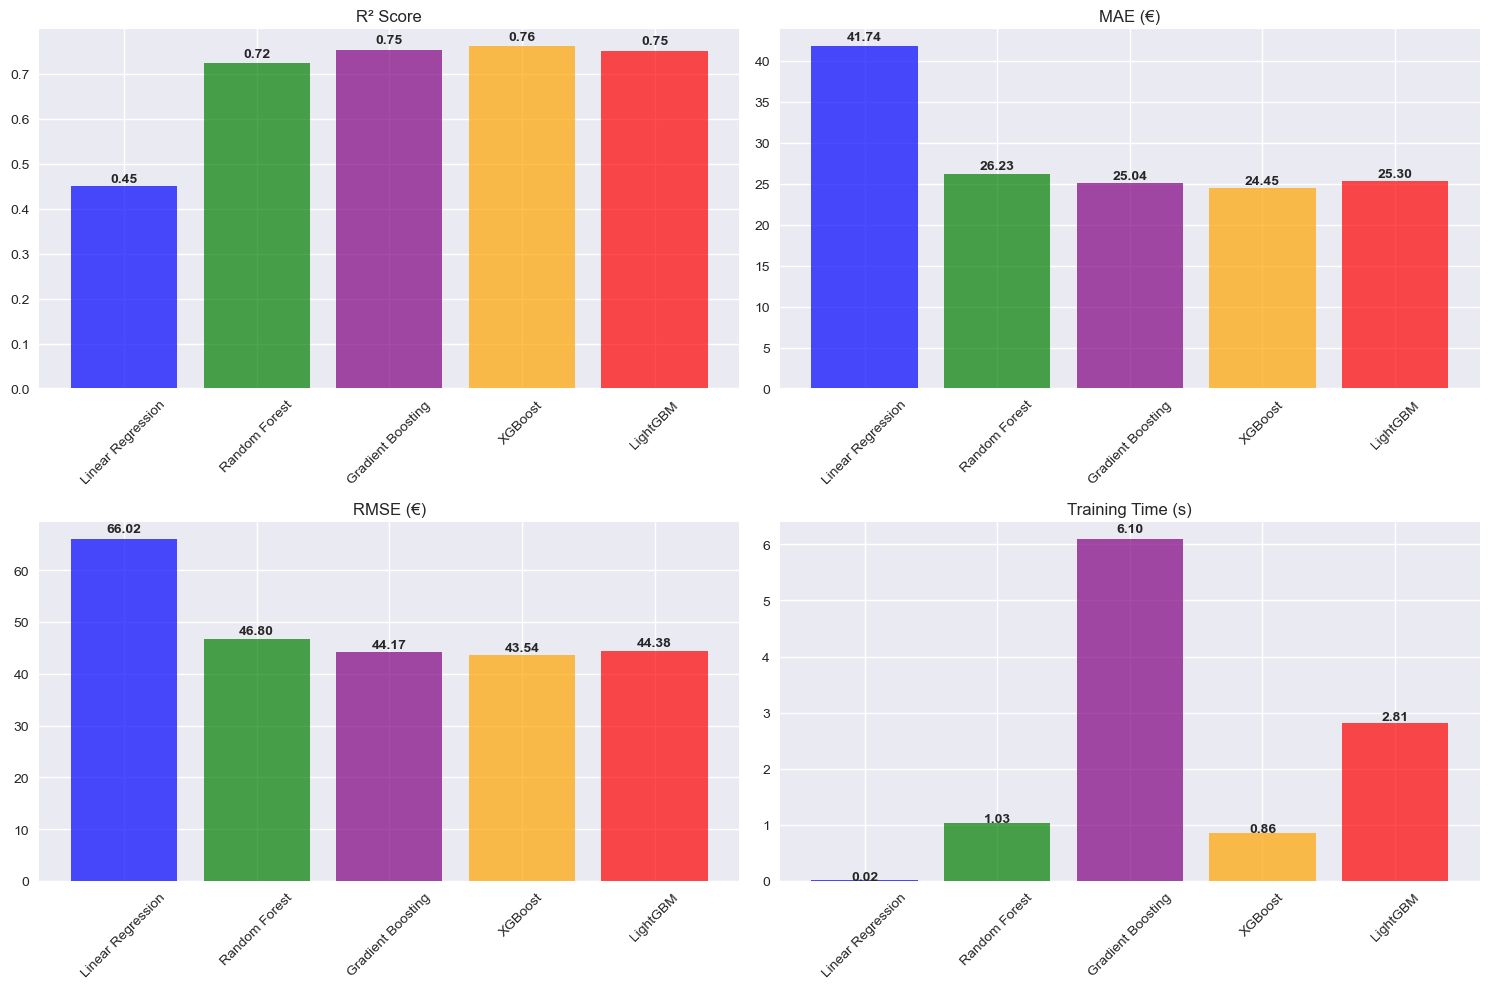

In [18]:
# Model Comparison

# Collect all results
models_results = {
    'Linear Regression': {'R2': lr_r2, 'MAE': lr_mae, 'RMSE': lr_rmse, 'Training Time': lr_time, 'predictions': lr_pred},
    'Random Forest': {'R2': rf_r2, 'MAE': rf_mae, 'RMSE': rf_rmse, 'Training Time': rf_time, 'predictions': rf_pred},
    'Gradient Boosting': {'R2': gb_r2, 'MAE': gb_mae, 'RMSE': gb_rmse, 'Training Time': gb_time, 'predictions': gb_pred},
    'XGBoost': {'R2': xgb_r2, 'MAE': xgb_mae, 'RMSE': xgb_rmse, 'Training Time': xgb_time, 'predictions': xgb_pred},
    'LightGBM': {'R2': lgb_r2, 'MAE': lgb_mae, 'RMSE': lgb_rmse, 'Training Time': lgb_time, 'predictions': lgb_pred}
}

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_results).T
comparison_df.columns = ['R² Score', 'MAE (€)', 'RMSE (€)', 'Training Time (s)', 'Predictions']

print("MODEL PERFORMANCE COMPARISON:")
print(comparison_df[['R² Score', 'MAE (€)', 'RMSE (€)', 'Training Time (s)']].round(3))

# Best models
best_models = {
    'R²': comparison_df['R² Score'].idxmax(),
    'MAE': comparison_df['MAE (€)'].idxmin(), 
    'RMSE': comparison_df['RMSE (€)'].idxmin(),
    'Training Time': comparison_df['Training Time (s)'].idxmin()
}
print(f"\nBest Models: R²={best_models['R²']}, MAE={best_models['MAE']}, RMSE={best_models['RMSE']}, Training Time={best_models['Training Time']}")

# Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
colors = ['blue', 'green', 'purple', 'orange', 'red']

# Metrics bar charts
metrics = [('R² Score', 'R² Score'), ('MAE (€)', 'MAE (€)'), ('RMSE (€)', 'RMSE (€)')]
for i, (col, title) in enumerate(metrics):
    row, col_idx = (0, i) if i < 2 else (1, 0)
    axes[row, col_idx].bar(comparison_df.index, comparison_df[col], color=colors, alpha=0.7)
    axes[row, col_idx].set_title(title)
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    for j, v in enumerate(comparison_df[col]):
        axes[row, col_idx].text(j, v + v*0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Training time plot
axes[1,1].bar(comparison_df.index, comparison_df['Training Time (s)'], color=colors, alpha=0.7)
axes[1,1].set_title('Training Time (s)')
axes[1,1].tick_params(axis='x', rotation=45)
for j, v in enumerate(comparison_df['Training Time (s)']):
    axes[1,1].text(j, v + v*0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

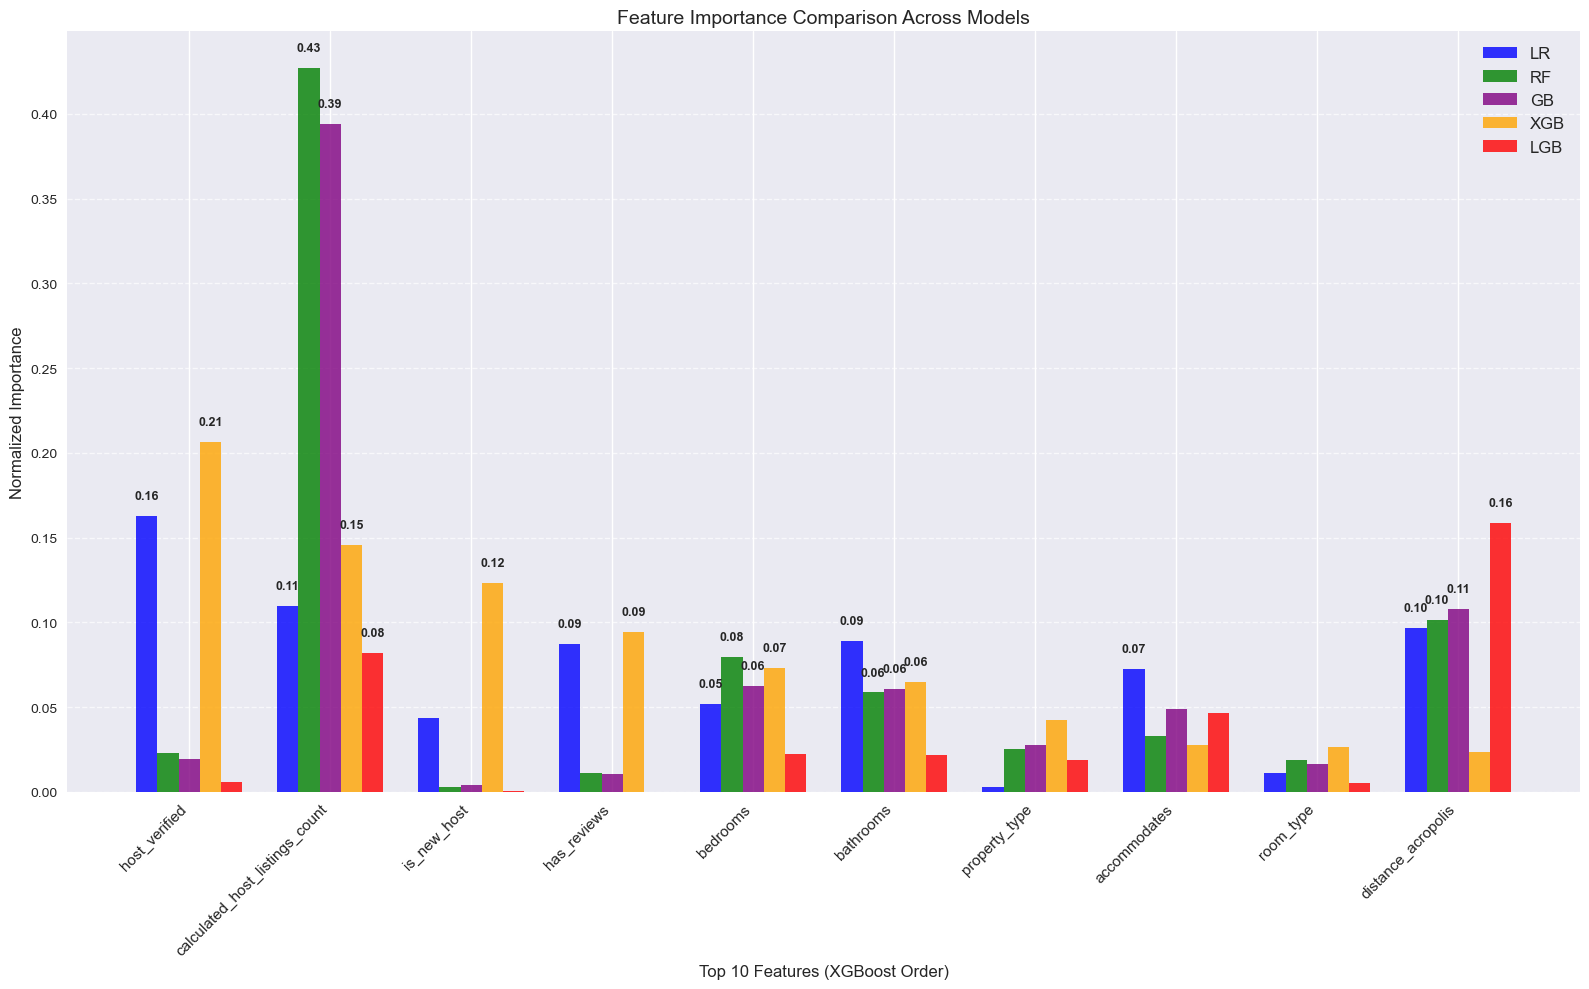

In [19]:
# Feature Importance Comparison
plt.figure(figsize=(16, 10))  

try:
    importances = []
    labels = ['LR', 'RF', 'GB', 'XGB', 'LGB']
    importance_vars = [lr_feature_importance, rf_feature_importance, gb_feature_importance, 
                      xgb_feature_importance, lgb_feature_importance]
    
    # Use XGBoost's feature order
    xgb_features = xgb_feature_importance.head(10)['feature'].tolist()
    
    # For each model, extract importance for XGBoost's top 10 features
    for imp_df in importance_vars:
        model_importances = []
        for feature in xgb_features:
            if feature in imp_df['feature'].values:
                feature_importance = imp_df[imp_df['feature'] == feature]['importance'].iloc[0]
                model_importances.append(feature_importance)
            else:
                model_importances.append(0)
        importances.append(model_importances)
    
    # Plot 
    x = np.arange(10)
    width = 0.15
    for i, (imp, label, color) in enumerate(zip(importances, labels, colors)):
        plt.bar(x + i*width - 2*width, imp, width, label=label, color=color, alpha=0.8)
    
    plt.xlabel('Top 10 Features (XGBoost Order)', fontsize=12)
    plt.ylabel('Normalized Importance', fontsize=12)
    plt.title('Feature Importance Comparison Across Models', fontsize=14)
    plt.xticks(x, xgb_features, rotation=45, ha='right', fontsize=11)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels 
    for i, model_imp in enumerate(importances):
        for j, v in enumerate(model_imp):
            if v >= 0.05:  # Only label bars with importance >= 5%
                plt.text(j + i*width - 2*width, v + 0.01, f'{v:.2f}', 
                        ha='center', fontweight='bold', fontsize=9)
    
except Exception as e:
    plt.text(0.5, 0.5, f'Feature importance comparison unavailable\n{str(e)}', 
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()